# Python SQL

## 1. Set up

### Download PostgreSQL
- Google: "download PostgreSQL"
- Go to the download page, for example: https://www.postgresql.org/download

### Install PostgreSQL
- Click on the installer you've just downloaded an follow then instruction

### Download the sample data
- Download the sample data here: https://sp.postgresqltutorial.com/wp-content/uploads/2019/05/dvdrental.zip
- Load sample data into `dvdrental`

### Test the loaded database
- Righ-click on `dvdrental` database, choose `Query Tool`
- In the query editor, write some simple select queries and run to test
- Example
```sql
select * 
from actor
limit 10
```

```sql
select count(*)
from actor
```

### Install `psycopg2`

## 2. Connect Python to `dvdrental` database

In [43]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a connection
conn = psycopg2.connect(
    host = "localhost",
    port = 5432, 
    database = "dvdrental",
    user = "postgres",
    password= "nguyenquanghuy25",
)

In [3]:
# Test query
test = "select * from film limit 5"
df = pd.read_sql(test, conn)

In [14]:
df

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...


## 3. Basic queries

### SELECT

In [10]:
query = """
select first_name,
        last_name, 
        (first_name || ' ' || last_name) as fullname,
        email
from customer
limit 5
"""

pd.read_sql(query, conn)

,first_name,last_name,fullname,email
0,Jared,Ely,Jared Ely,jared.ely@sakilacustomer.org
1,Mary,Smith,Mary Smith,mary.smith@sakilacustomer.org
2,Patricia,Johnson,Patricia Johnson,patricia.johnson@sakilacustomer.org
3,Linda,Williams,Linda Williams,linda.williams@sakilacustomer.org
4,Barbara,Jones,Barbara Jones,barbara.jones@sakilacustomer.org


In [20]:
query = """ 
    select *
    from film
    limit 1
"""
pd.read_sql(query, conn)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...


In [22]:
query = """
select 
        title,
        rental_rate,
        length
from film
limit 3
"""
pd.read_sql(query, conn)

,title,rental_rate,length
0,Chamber Italian,4.99,117
1,Grosse Wonderful,4.99,49
2,Airport Pollock,4.99,54


### ORDER BY


### DISTINCT

### WHERE

In [19]:
q = """
select first_name,
        upper(first_name) as fn_lower
from customer
where 
    (trim(lower(first_name)) like 'b%')
    and (first_name like '%y')

"""
pd.read_sql(q,conn)

,first_name,fn_lower
0,Betty,BETTY
1,Beverly,BEVERLY
2,Brittany,BRITTANY
3,Brandy,BRANDY
4,Becky,BECKY
5,Billy,BILLY
6,Bobby,BOBBY
7,Bradley,BRADLEY
8,Barry,BARRY


### LIKE


### LIMIT
In ra số dòng đầu

In [22]:
q = """
select category_id, name
from category
limit 6
"""
pd.read_sql(q, conn)

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy
5,6,Documentary


### OFFSET
Loại trừ N dòng đầu 

In [23]:
q = """
select category_id, name
from category
limit 3
offset 3
"""
pd.read_sql(q, conn)

,category_id,name
0,4,Classics
1,5,Comedy
2,6,Documentary


### COUNT
- Count tương tự `.shape[0]` -> số dòng
- Count distinct tương tự `.nunique()`

In [27]:
q = """
select Count(*)
from film
limit 1
"""
pd.read_sql(q, conn)

,count
0,1000


In [29]:
q = """
select Count(distinct rating) as nd_rating
from film
limit 1
"""
pd.read_sql(q, conn)

,nd_rating
0,5


### COUNT DISTINCT

In [31]:
# Có bao nhiêu distinct  retal_rate từ bảng films
q = """
select count(distinct rental_rate)
from film
"""
pd.read_sql(q, conn)

,rental_rate
0,2.99
1,4.99
2,0.99


### IN
Tương tự như `isin()`

In [3]:
q = """
select 
    title,
    rental_duration
from film
where 
    rental_duration in (3, 5, 7)
limit 100
"""
pd.read_sql(q, conn)

,title,rental_duration
0,Chamber Italian,7
1,Grosse Wonderful,5
2,Ace Goldfinger,3
3,Adaptation Holes,7
4,Affair Prejudice,5
...,...,...
95,Core Suit,3
96,Coldblooded Darling,7
97,Comancheros Enemy,5
98,Comforts Rush,3


In [5]:
q = """
select title, rating
from film
where rating in ('R', 'G', 'PG')
limit 100
"""
pd.read_sql(q, conn)

,title,rating
0,Grosse Wonderful,R
1,Airport Pollock,R
2,Academy Dinosaur,PG
3,Ace Goldfinger,G
4,Affair Prejudice,G
...,...,...
95,Cider Desire,PG
96,Citizen Shrek,G
97,Clerks Angels,G
98,Clones Pinocchio,R


### BETWEEN

### CAST
- chuyển đổi kiểu dữ liệu 
- Tương tự như `.astype()`

In [6]:
q = """ 
select customer_id,
        cast(amount as text) as amount_str
from payment
limit 5
"""
pd.read_sql(q, conn).dtypes

customer_id     int64
amount_str     object
dtype: object

In [10]:
# Round: Làm tròn chữ số 
query = """
select round(amount, 1) as amount_1
from payment
limit 5
"""
pd.read_sql(query, conn)

,amount_1
0,8.0
1,2.0
2,8.0
3,3.0
4,8.0


### WORKING WITH DATES

In [38]:
# Lọc ra tất cả các payment trong giao đoạn 2007/02/15 to 2007/02/19
q = """
select *
from payment
where 
    payment_date >= '2007/02/15 00:00:00' 
    and payment_date <= '2007/02/20 00:00:00'
"""
pd.read_sql(q, conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17509,342,2,2190,5.99,2007-02-17 23:58:17.996577
...,...,...,...,...,...,...
1480,19513,267,1,2582,6.99,2007-02-19 03:24:53.996577
1481,19514,267,2,2699,2.99,2007-02-19 11:57:54.996577
1482,19515,267,2,2754,4.99,2007-02-19 15:24:25.996577
1483,19516,267,1,2877,1.99,2007-02-19 23:35:42.996577


In [18]:
# Lấy cột title, last_update
# Tạo cột prev_date cách 10 ngày về trước 
# Tạo cột next_date cách 1 tháng trở về sau 

query = """
select title, last_update,
        date(last_update) as last_update,
        (last_update - interval'10 days') as prev_date,
        (last_update + interval'1 month') as next_date
from film
limit 5
"""
pd.read_sql(query, conn)

,title,last_update,last_update,prev_date,next_date
0,Chamber Italian,2013-05-26 14:50:58.951,2013-05-26,2013-05-16 14:50:58.951,2013-06-26 14:50:58.951
1,Grosse Wonderful,2013-05-26 14:50:58.951,2013-05-26,2013-05-16 14:50:58.951,2013-06-26 14:50:58.951
2,Airport Pollock,2013-05-26 14:50:58.951,2013-05-26,2013-05-16 14:50:58.951,2013-06-26 14:50:58.951
3,Bright Encounters,2013-05-26 14:50:58.951,2013-05-26,2013-05-16 14:50:58.951,2013-06-26 14:50:58.951
4,Academy Dinosaur,2013-05-26 14:50:58.951,2013-05-26,2013-05-16 14:50:58.951,2013-06-26 14:50:58.951


In [24]:
# Lấy ra năm trong payment_date
q = """
select 
    payment_date,
    date_part('year', payment_date) as year
from payment
limit 5
"""
pd.read_sql(q,conn)

,payment_date,year
0,2007-02-15 22:25:46.996577,2007.0
1,2007-02-16 17:23:14.996577,2007.0
2,2007-02-16 22:41:45.996577,2007.0
3,2007-02-19 19:39:56.996577,2007.0
4,2007-02-20 17:31:48.996577,2007.0


In [25]:
# Extract : trích xuất
q = """
select 
    payment_date,
    extract('century' from payment_date) as century
from payment
limit 5
"""
pd.read_sql(q,conn)

,payment_date,century
0,2007-02-15 22:25:46.996577,21.0
1,2007-02-16 17:23:14.996577,21.0
2,2007-02-16 22:41:45.996577,21.0
3,2007-02-19 19:39:56.996577,21.0
4,2007-02-20 17:31:48.996577,21.0


### NULL

In [27]:
# Tìm nhân viên chưa có ảnh upload

q = """
select *
from staff
where picture is null
"""
pd.read_sql(q, conn)

,staff_id,first_name,last_name,address_id,email,store_id,active,username,password,last_update,picture
0,2,Jon,Stephens,4,Jon.Stephens@sakilastaff.com,2,True,Jon,8cb2237d0679ca88db6464eac60da96345513964,2006-05-16 16:13:11.793280,None


### TRIM

### JOIN

### GROUP BY 

#### Ex1: 
- Group phim theo rating, đếm số lượng cho mỗi loại rating, sắp xếp từ cao xuống thấp
- Plot
- Làm tương tự cho từng tháng (gồm cả plot)

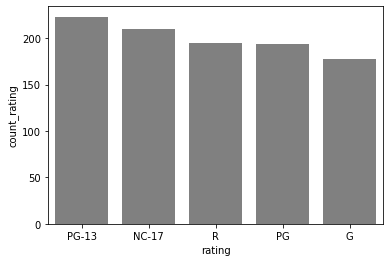

In [47]:
query = """
select rating ,Count(rating) as count_rating
from film
group by rating
order by count_rating desc
"""

df = pd.read_sql(query, conn)

fix, ax = plt.subplots()
sns.barplot(
    x = "rating",
    y = "count_rating",
    color = "grey",
    ax = ax,
    data = df
)
plt.show()

### HAVING